# Introduction

Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

# Dataset

We will be basing our analysis on the listings. Fist to see the impact of various factors on price. second, we will use a NLP to analyse the description of the listings to observe if they have an impact on the price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
listings = pd.read_csv("listings.csv.gz")

In [3]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,590919120520645193,https://www.airbnb.com/rooms/590919120520645193,20221206172149,2022-12-06,city scrape,"Spacious, liveable, apartment complex.","Peaceful, quiet, family oriented.",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,450628013,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,724469148798074768,https://www.airbnb.com/rooms/724469148798074768,20221206172149,2022-12-06,city scrape,Gadio’s Getaway in Dallas,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,217651977,...,5.0,5.0,5.00,NaN,t,5,1,4,0,0.67
2,716914096315109767,https://www.airbnb.com/rooms/716914096315109767,20221206172149,2022-12-06,city scrape,Lovely 1 Bedroom Rental Unit with free Parking,Forget your worries in this spacious and seren...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,463228509,...,4.5,4.5,3.75,NaN,f,1,1,0,0,2.35
3,682798437855353056,https://www.airbnb.com/rooms/682798437855353056,20221206172149,2022-12-06,city scrape,Beautiful Spacious Condo 10 min from Downtown,Forget your worries in this spacious and seren...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,464917277,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,672539562939046570,https://www.airbnb.com/rooms/672539562939046570,20221206172149,2022-12-07,city scrape,You’re beautiful home away from home…Staycation,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,454845204,...,5.0,5.0,5.00,NaN,f,1,1,0,0,0.22


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5761 non-null   int64  
 1   listing_url                                   5761 non-null   object 
 2   scrape_id                                     5761 non-null   int64  
 3   last_scraped                                  5761 non-null   object 
 4   source                                        5761 non-null   object 
 5   name                                          5761 non-null   object 
 6   description                                   5682 non-null   object 
 7   neighborhood_overview                         3423 non-null   object 
 8   picture_url                                   5761 non-null   object 
 9   host_id                                       5761 non-null   i

In [5]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1091
Length: 75, dtype: int64

# Data Cleaning and exploration

as we can see from the preview above, the data contains alot of NA values, so we have to remove them

In [6]:
listings.dropna(axis = 1, how = "all", inplace = True)

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5761 non-null   int64  
 1   listing_url                                   5761 non-null   object 
 2   scrape_id                                     5761 non-null   int64  
 3   last_scraped                                  5761 non-null   object 
 4   source                                        5761 non-null   object 
 5   name                                          5761 non-null   object 
 6   description                                   5682 non-null   object 
 7   neighborhood_overview                         3423 non-null   object 
 8   picture_url                                   5761 non-null   object 
 9   host_id                                       5761 non-null   i

# Data enhancement

In [8]:
listings.bathrooms_text.unique()

array(['1.5 baths', '1 shared bath', '1 bath', '2 baths',
       '1 private bath', 'Private half-bath', '2.5 baths', '4 baths',
       '3 baths', '3 shared baths', '3.5 baths', '1.5 shared baths',
       '4.5 baths', '2 shared baths', '5.5 baths', '0 baths',
       '2.5 shared baths', '7 baths', '11.5 baths', '5 baths',
       '12 shared baths', '12.5 shared baths', '6 baths', 'Half-bath',
       nan, '8 baths', '7.5 baths', '10 baths', '0 shared baths',
       '12 baths'], dtype=object)

In [9]:
listings.bathrooms_text=listings.bathrooms_text.str.replace("shared","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("Shared","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("bath","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("Private","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("half-bath","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("s","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("private","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("half-","")
listings.bathrooms_text=listings.bathrooms_text.str.replace("Half-","")

In [10]:
listings["bath"]=listings.bathrooms_text

In [11]:
listings.bath.unique()

array(['1.5 ', '1  ', '1 ', '2 ', ' ', '2.5 ', '4 ', '3 ', '3  ', '3.5 ',
       '1.5  ', '4.5 ', '2  ', '5.5 ', '0 ', '2.5  ', '7 ', '11.5 ', '5 ',
       '12  ', '12.5  ', '6 ', '', nan, '8 ', '7.5 ', '10 ', '0  ', '12 '],
      dtype=object)

In [12]:
listings.drop("bathrooms_text", axis=1, inplace=True)

In [13]:
# remove the $ sign from price column and covert it to a numeric variable
listings.price = listings.price.apply(lambda x: x[1:])
listings.price = listings.price.apply(lambda x: x[:-3])
listings.price = listings.price.apply(lambda x: x.replace(",","."))
listings.price = listings.price.apply(lambda x: int(float(x)))

In [14]:
listings.price.dtype

dtype('int64')

# Exploration

### number of listings per neighbourhood

In [15]:
listings.neighbourhood_cleansed.unique()

array(['District 3', 'District 4', 'District 1', 'District 8',
       'District 6', 'District 7', 'District 2', 'District 13',
       'District 11', 'District 12', 'District 14', 'District 9',
       'District 10', 'District 5'], dtype=object)

Text(0.5, 1.0, 'Neighbourhoods')

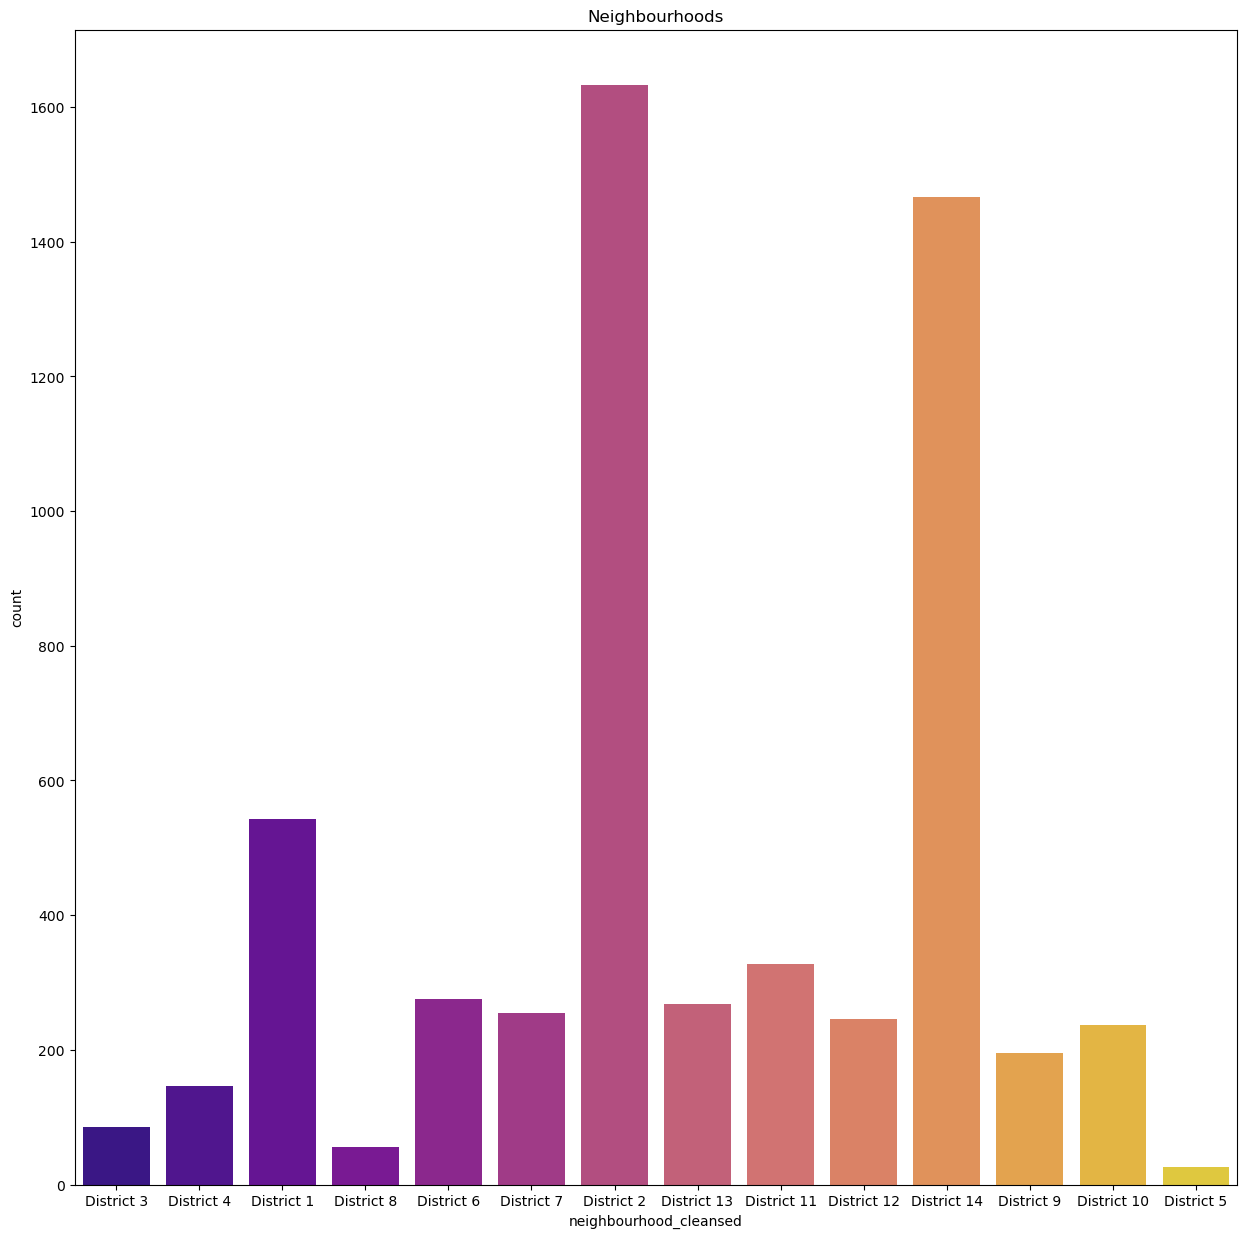

In [16]:
sns.countplot(x=listings["neighbourhood_cleansed"], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Neighbourhoods')

### visual representation

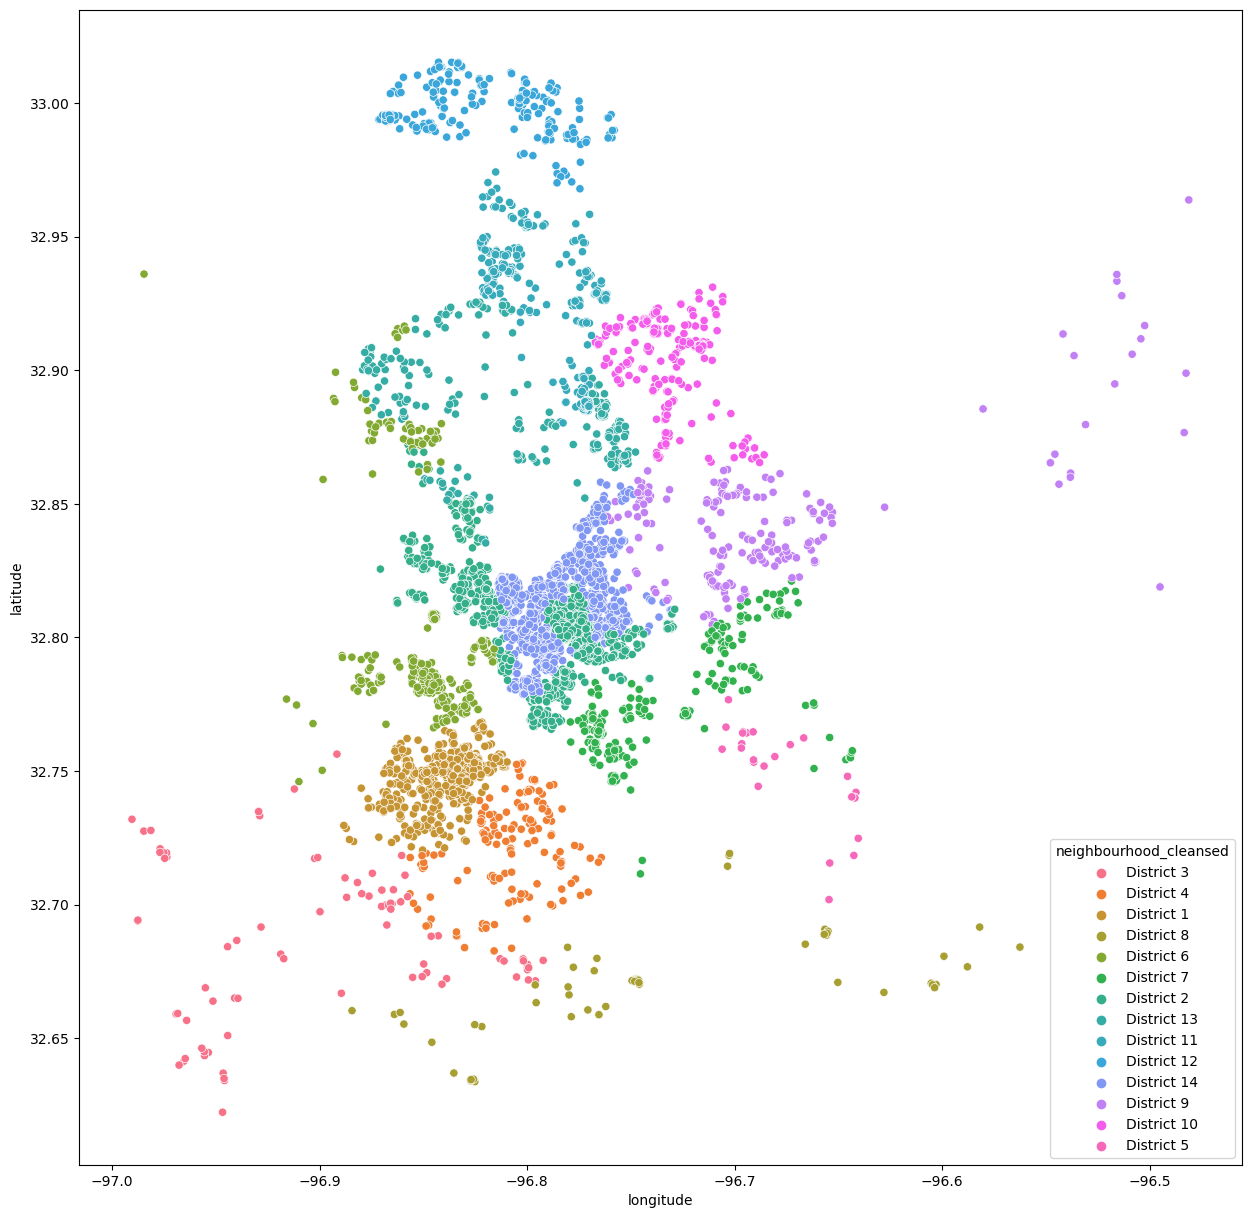

In [17]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=listings.longitude,y=listings.latitude,hue=listings.neighbourhood_cleansed)
plt.ioff()
plt.show()

we can see that the majority of rental units are near the center of town.
In addition, we can see that District 2, the most listed, is near the center of dallas.

### price per neighbourhood

In [18]:
means = listings.groupby('neighbourhood_cleansed')['price'].mean()
means = pd.DataFrame(means).reset_index()

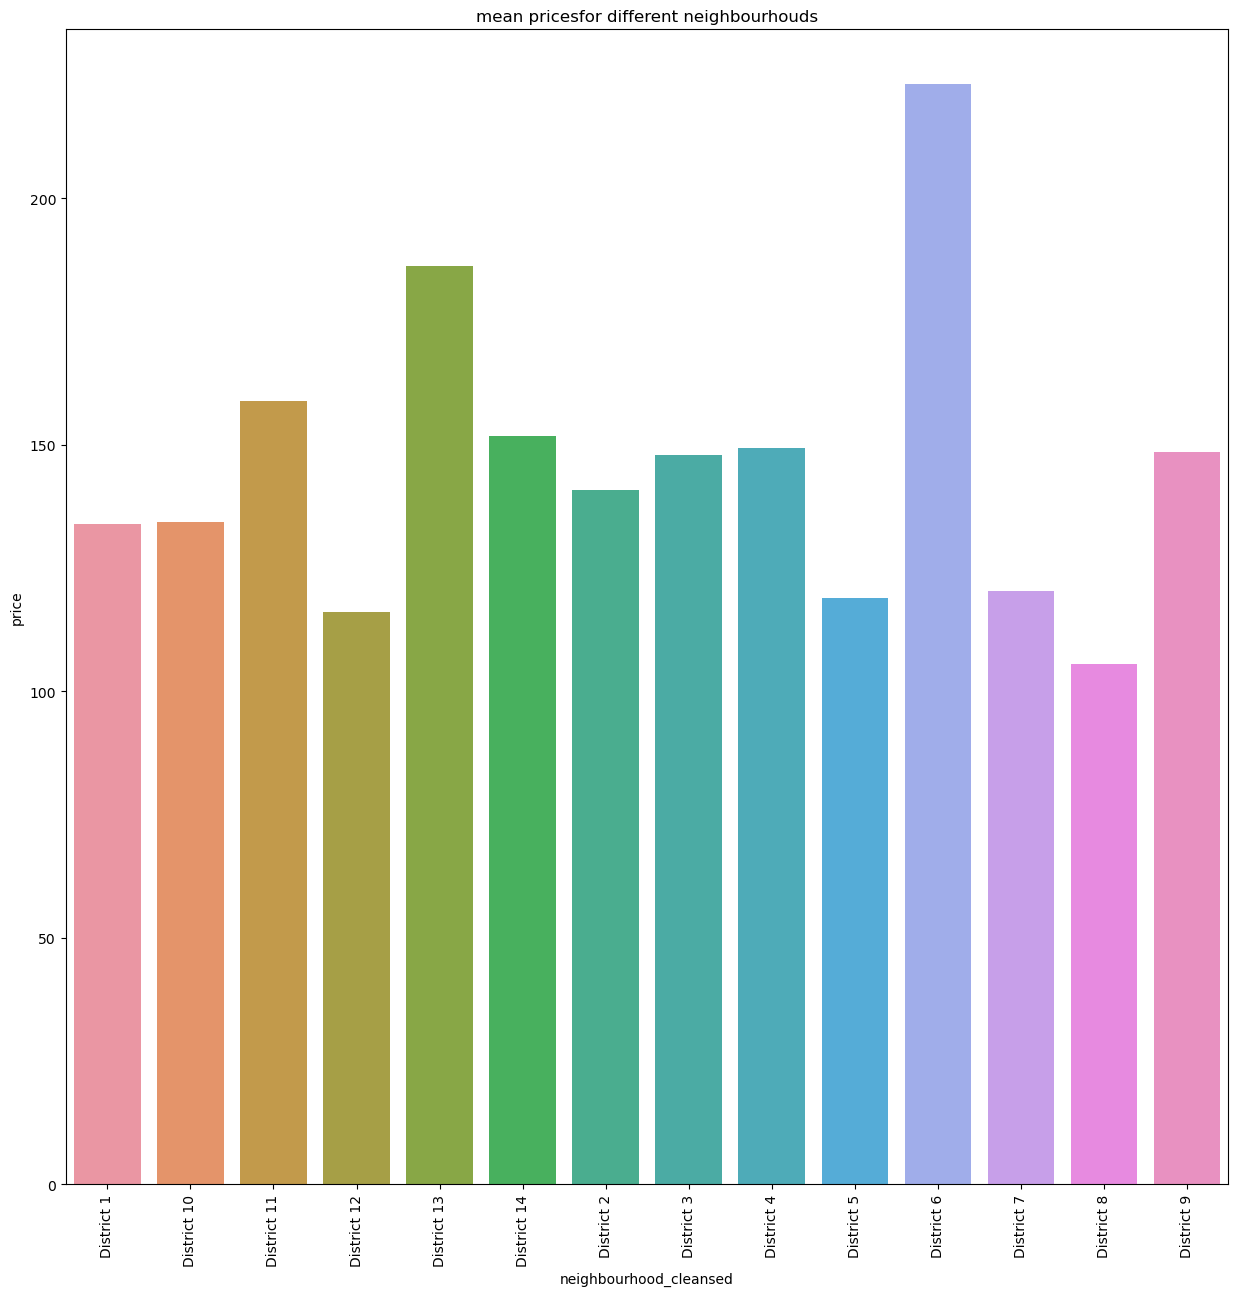

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(x= means.neighbourhood_cleansed, y = means.price).set_title('mean pricesfor different neighbourhouds')
plt.xticks(rotation=90)
plt.show()

we can see that District 6 rental units are the most expensive while District 8 are the cheapest units in Dallas
In addition, our map above let us know that district 8 is in the center of the city while District 6 is the furtherest, this is the reason why people charge more

### rental unit types

In [20]:
listings.property_type.unique()

array(['Entire condo', 'Private room in home', 'Entire rental unit',
       'Entire home', 'Entire vacation home', 'Entire guesthouse',
       'Private room in condo', 'Private room in townhouse',
       'Private room in bungalow', 'Yurt', 'Shared room in home',
       'Room in hotel', 'Entire townhouse', 'Shared room in rental unit',
       'Entire villa', 'Entire bungalow', 'Private room in rental unit',
       'Room in boutique hotel', 'Entire serviced apartment', 'Tiny home',
       'Entire loft', 'Entire place', 'Camper/RV', 'Tower',
       'Private room in bed and breakfast', 'Entire guest suite',
       'Private room in guest suite', 'Shared room in guesthouse',
       'Shared room in condo', 'Casa particular', 'Shared room in loft',
       'Entire cottage', 'Private room in cottage',
       'Private room in loft', 'Private room in guesthouse',
       'Private room in serviced apartment', 'Shared room in townhouse',
       'Castle', 'Shared room in pension', 'Earthen home', 'Hou

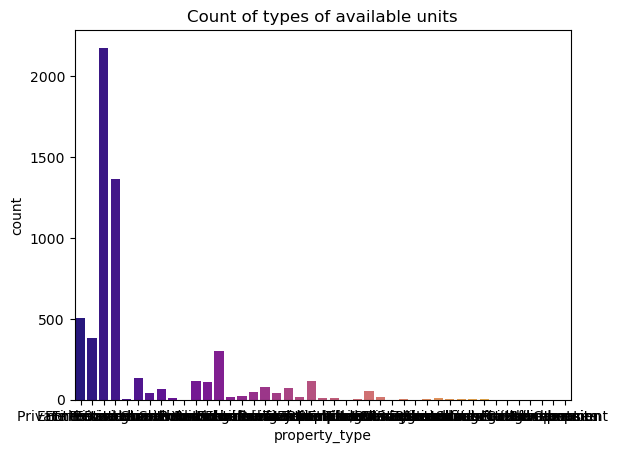

In [21]:
sns.countplot(x=listings['property_type'], palette="plasma")
fig.set_size_inches(15,15)
plt.title("Count of types of available units")
plt.show()

### since we have alot of types, a graph is not really informative, so we are going to count them

In [22]:
aparts = listings.groupby('property_type')['property_type'].count()
aparts = pd.DataFrame(aparts)
aparts = aparts.rename(columns={'property_type': 'type', 'property_type': 'Count'})
aparts.sort_values(by="Count")

,Count
property_type,
Yurt,1
Tower,1
Private room,1
Shared room in guesthouse,1
Shared room in pension,1
Houseboat,1
Earthen home,1
Castle,1
Casa particular,1


### Availability

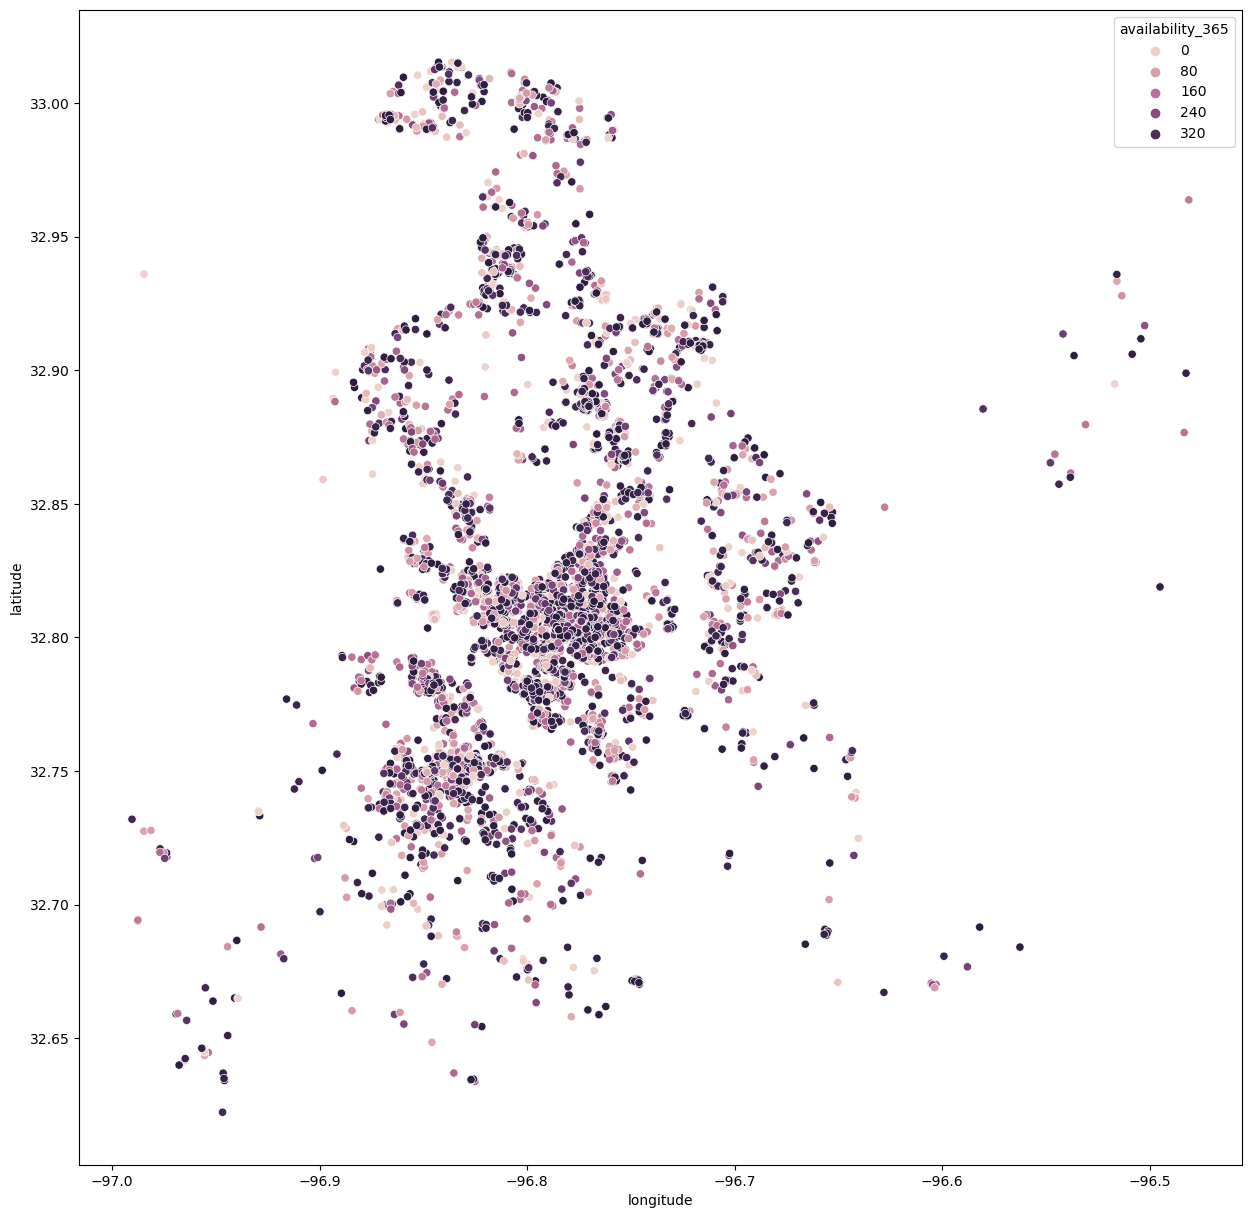

In [23]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=listings.longitude,y=listings.latitude,hue=listings.availability_365)
plt.ioff()
plt.show()

we can see that the appartments in the middle of town tend to be more available while, the outter districts tend to be less available, we can safely assume that on average, the most available units will also be more expensive based on our previous finds for the relation between price and placement.

### correlation Map

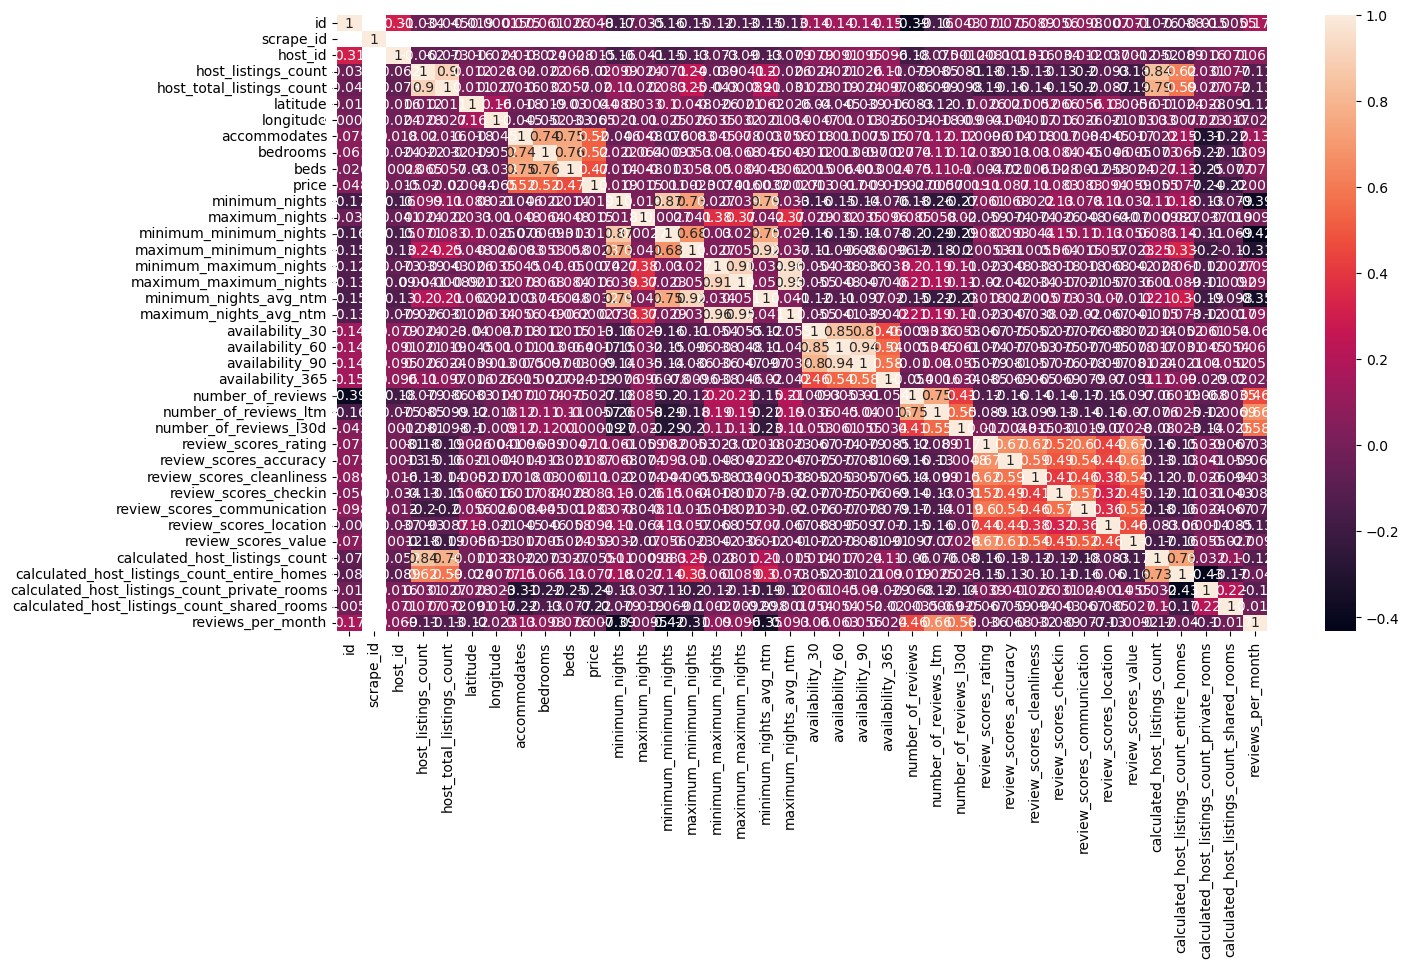

In [24]:
corr = listings.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

the correlation map is hard to read, so we are going to use fastai to helps us tell which variables are important

# Fastai Model

In [25]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [26]:
dep_var="price"

In [27]:
cont,cat = cont_cat_split(listings, 1, dep_var=dep_var)

In [28]:
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(listings))

In [29]:
to = TabularPandas(listings, procs, cat, cont, y_names=dep_var, splits=splits)

and just like that with 4 lines of code our data is completly processed and we can see below

In [30]:
to.xs.iloc[:2]

,listing_url,scrape_id,last_scraped,source,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3402,2698,1,1,1,...,-0.199255,-0.198337,-0.153119,-0.692158
842,1656,1,2,2,...,-0.402592,-0.053259,-0.153119,-0.256157


In [31]:
save_pickle('to.pkl',to)

In [32]:
to = load_pickle('to.pkl')

In [33]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [34]:
m = DecisionTreeRegressor(max_leaf_nodes=2900)
m.fit(xs, y);

Having a powerful machine is really nice XD 

In [35]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [36]:
m_rmse(m, xs, y)

0.94238

In [37]:
def rf(xs, y, n_estimators=40, max_samples=4600,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [38]:
m = rf(xs,y);

In [39]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [40]:
fi = rf_feat_importance(m, xs)
fi[:15]

,cols,imp
51,bedrooms,0.194735
33,bath,0.183701
50,accommodates,0.123953
25,property_type,0.021965
48,latitude,0.020590
7,picture_url,0.020217
52,beds,0.020166
9,host_name,0.018201
8,host_url,0.016130
73,review_scores_location,0.015015


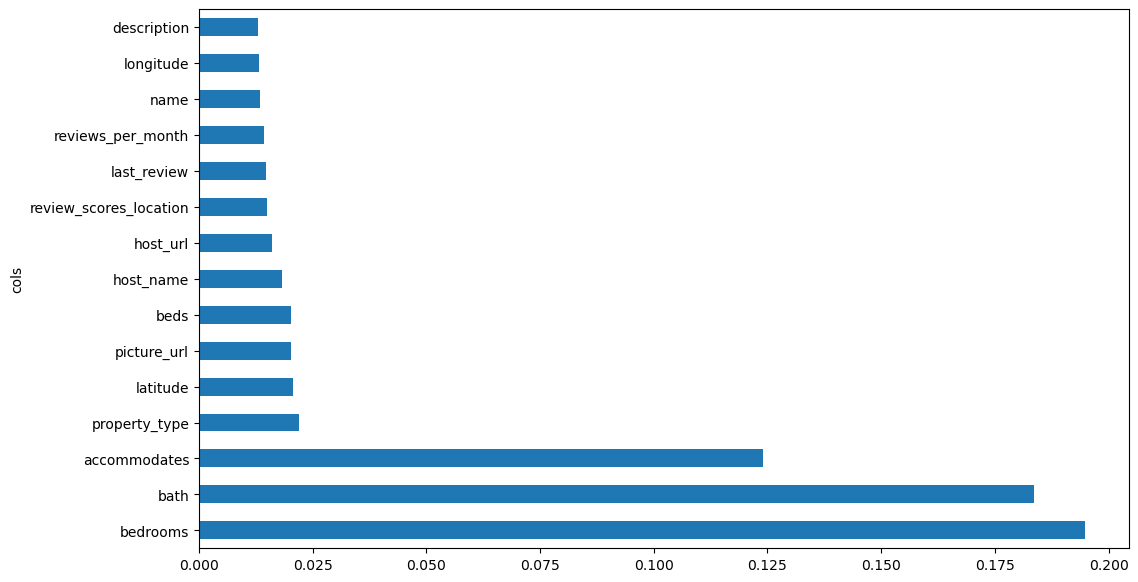

In [41]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:15])
plt.show()

when you have such a large dataframe with an enourmous amount of variables. Feature importance is a useful that helps us determine the main factors that infleunce the price, allow us to determine which variables to keep, and which variables to discard.

The way these importances are calculated is quite simple yet elegant. The feature importance algorithm loops through each tree, and then recursively explores each branch. At each branch, it looks to see what feature was used for that split, and how much the model improves as a result of that split. The improvement (weighted by the number of rows in that group) is added to the importance score for that feature. This is summed across all branches of all trees, and finally the scores are normalized such that they add to 1.

### How can the host improve

from the graph above we can see which elements matter in regards to the price. Exluding the elements that the host can't controle, s/he should do the following:
- *Make more bedrooms available if possible 
- *Give the guest access to more baths
- *Increase the number of beds
- Make the listing picture as pleasant as possible
- Complete his profile (host URL)
- Make a very detailed and flattering description
- Maximize the number of reviews
- Make more amenties available we are going to see which in the Model below

# NLTK model

In order to analyse which ammenities impact the price the most we are going to us NLTK

In [83]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /home/jupyter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
nlp=listings[["amenities","price","id"]]

In [85]:
nlp.to_csv("nlp.csv")

In [86]:
nlp_df=pd.read_csv("nlp.csv")

In [87]:
nlp_df.sort_values('price',ascending=[0],inplace=True)

In [88]:
top_amenities=nlp_df.head(50)

In [95]:
def display_model(plot_words_list):
    wordcloud = WordCloud(width = 1000, height = 700).generate(plot_words_list)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [96]:
amenities = ''
for index,row in top_amenities.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    amenities+=p

In [97]:
amenities_df=nltk.word_tokenize(amenities)
stop_words=[word for word in allemenities_data if word not in stopwords.words('english')] 

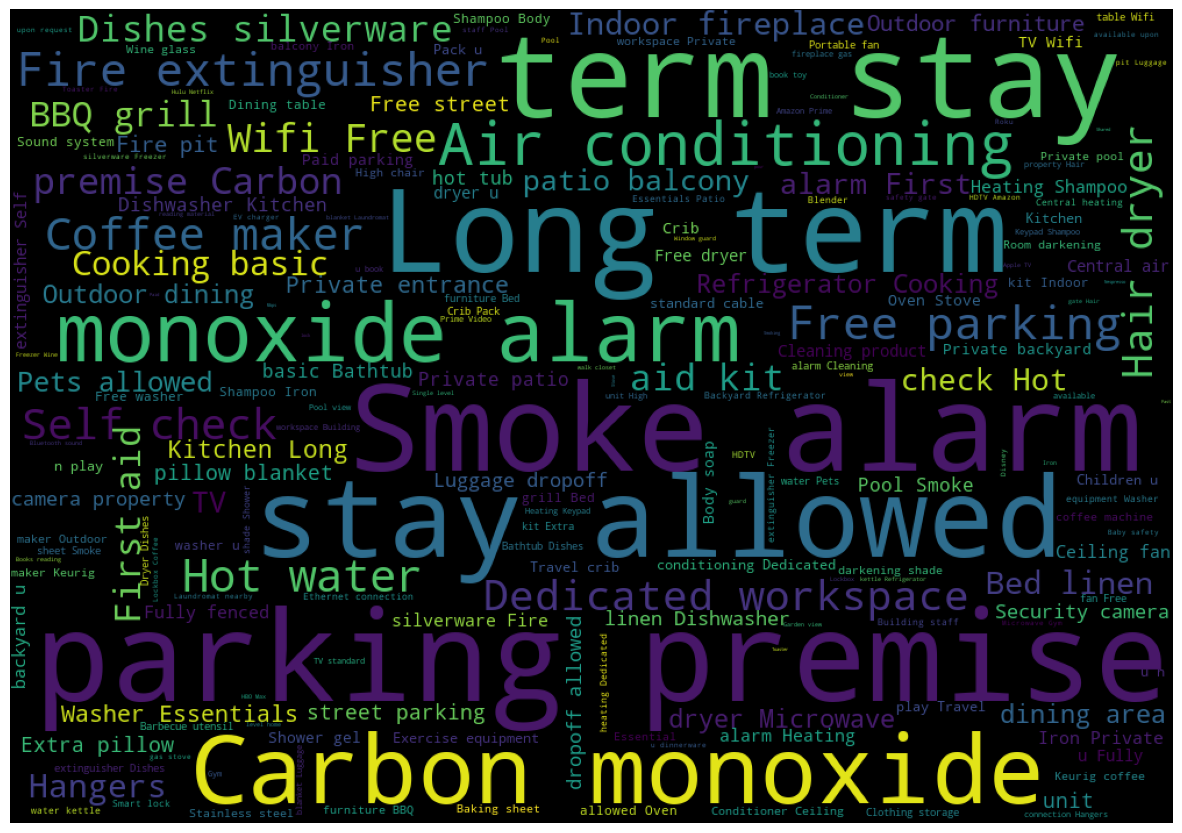

In [99]:
wnl = nltk.WordNetLemmatizer() 
stemming=[wnl.lemmatize(data) for data in stop_words]
amenities_words=' '.join(stemming)
display_model(amenities_words)

we can see that the amenities available in the top 50 most exepensive appartments tend to be the following, the hosts can increase their price if they add them :
- Long term stays
- Parking premises
- WIFI

# Conclusion

- the host should mainly focus on beds, bath, and accommodates in order to increase their prices, any change in other variables will yield marginal results.
- in the amenities hosts should focus on long term stays, and making the guests life more easier by bringing parking premises and wifi.